# 实践5 循环结构

## 学习目标
1. 理解循环就是反复执行一组特定操作；  
2. 掌握 `for` 循环，可以针对一组数据进行循环；  
3. 掌握 `while` 循环，根据循环条件成立与否来决定循环是否继续；  
4. 理解可以使用 `continue` 和 `break` 语句来改变循环的执行流程。


# 循环结构

循环也是一种常见结构，它代表了一种常见模式：批处理。我们在现实生活中也经常面对“批处理”这种模式：
* 我们乘坐地铁，要坐十站去到目的地，那么就是把“乘坐一站地铁”循环十遍；
* 我们要洗一大串葡萄，就是把“洗一颗葡萄”循环 N 遍；
* 我们要学完这个部分，就是不断循环“学习下一章”直到“本部分没有更多章”。

我们写程序也是如此，计算机特别擅长的就是重复劳动，不知疲倦而且不走样，我们的程序经常是一次处理一组数据，对其中的每个数据做一些操作，然后下一个，然后下一个……直到这组数据都处理完，这就是循环的基本概念了。

循环可以用下面的逻辑来表述：
1. 从一组数据 S 中取出下一个数据 x => x 是一个变量，这对应一个赋值语句；
2. 对 x 执行若干操作 => 这对应一个代码段，里面可以有各种操作符和函数；
3. 如果 S 中还有未取出的数据，则回到第1步继续 => 这对应一个逻辑判断 `if...else`，但这个“回到第1步”是什么呢？
4. 结束。

上面第3步中的“回到第1步”就是循环实现的关键操作，这个要怎么做呢？

最早的一批编程语言对这个操作的实现真的就是按照“回到第1步”的字面意思做的，就是使用 *goto* 指令的**跳转语句**，这个语句让计算机跳到指定的一行执行，这样我们就可以复用上面的第1和第2步，不断的循环执行它们。不过后来 *goto* 语句闯了祸，被人类封印了，说白了就是 *goto* 太自由太强大了，可以在程序中任意的指定下一个执行的语句，当程序变大变复杂时导致程序的执行顺序非常难以预测，程序就很容易出错。
人们转而使用一种“有限制的跳转”来实现循环，Python 支持两种形式的循环语句，分别是 **for 循环** 和 **while 循环**，我们下面分别来介绍。

## for 循环

Python 的 `for` 循环可以对一组数据做循环，比如给出一个列表，可以针对列表里每个元素按顺序循环一遍。下面是例子：

In [ ]:
primes = [2, 3, 5, 7]
for prime in primes:
    print(prime)

列表我们还没正式介绍过，但已经零零星星出现过几次，这个东西非常重要，而且很多事情和它有关，我们在后面介绍会重点介绍列表，在此之前我们只要知道：列表就是方括号括起来的一串数据，里面每个数据可以是任何类型，并且是有序排列的。就像上面例子里的 `primes`，方括号括起来的四个素数。

而 `for` 循环的语法就像上面展示的：
1. `for prime in primes` 的意思是，从 `primes` 中取出下一个元素，将其赋值给 `prime`（这个变量叫做“**循环变量**”），然后运行下面缩进的代码段；
2. 在 `for` 语句最后冒号下面缩进的代码段，叫做“**循环体**”，是循环中反复执行的片段，这里我们简单地调用 `print()` 函数打印循环变量 prime 的值；
3. 循环体执行完毕就回到第1步执行 `for` 那一行，直到 `primes` 中取不出下一个元素，即列表循环完毕，整个循环结束。

Python 提供有一个内置函数 `range()` 可以构造任何整数等差数列，经常拿来和 `for` 循环一起用，在官方手册中 `range()` 函数的参数是[这么定义](https://docs.python.org/3.7/library/functions.html#func-range)的：

```python
range(stop)
range(start, stop[, step])
```

上面的文档说明 `range()` 这个函数有两个版本：第一个接受一个参数；第二个接受三个参数，其中最后一个有缺省值，所以可以不提供（方括号括起来的部分表示有缺省值、可提供可不提供的参数，这个方括号和上面表示列表的不是一回事哦）：
* 第一个版本中，唯一的参数是 `range()` 要构造的数列的上限，`range(stop)` 会输出从 `0` 到 `stop-1` 的 整数列；
* 第二个版本中，前两个参数分别是 `range()` 要构造的数列的下限和上限，`range(start, stop)` 会输出从 `start` 到 `stop-1` 的 整数列；如果还提供了第三个参数 `step`，这是等差数列的**公差**，`range(start, stop, step)` 会输出 `[start, start+step, start+step*2,...]` 这样一列整数，最大不超过 `stop-1`。

下面是一些例子：

In [ ]:
list(range(6))

注意我们在 `range()` 函数外面套了一个函数 `list()` 来把 `range()` 的输出结果转换为一个列表，这样方便我们看。

> 可能有善于思考的你会问：`range()` 的输出还要用 `list()` 来“转换为列表”，那 `range()` 输出的是什么呢？这是个好问题，`range()` 输出的是一个“**迭代器**（*iterator*）”，是 Python 非常有特色也非常强大的工具，可惜目前我们还不容易搞清楚这个东西，我们把它放在第四部分中，学完迭代器顺便还能知道 `for` 循环的本质是什么。

In [ ]:
list(range(2, 10)) # 注意 range() 输出是从 start 开始，到 stop-1 结束，也就是说，不包含后一个参数本身

In [ ]:
list(range(2, 10, 1)) # step 的缺省值就是 1，所以这句和上一句完全等价

In [ ]:
list(range(2, 10, 3)) # 这次指定了 3 作为公差，

`for` 循环用的那个列表不一定是数字，别的类型也都可以，比如在 Python 中字符串可以看作其中每个字符组成的列表，所以下面的代码会打印出字符串 s 中的每个字符：

In [ ]:
s = 'abracadabra'
for c in s:
    print(c)

其实 `for` 可以循环的东西远不止列表，我们在后面介绍迭代器的时候会再回来讨论 `for` 循环。

## while 循环

`while` 循环是更一般化的一种循环结构，基本上就是我们在本章开头描述的“只要某条件成立就继续循环，否则结束循环”的逻辑，那个使得循环继续的条件叫做“**循环条件**”。我们还是用例子来说明：

In [ ]:
count = 0
while count < 5:
    print(count)
    count += 1
    
print('Loop ends.')

上面的代码一开始变量 `count` 值为 0，然后开始一个 `while` 循环，循环条件是一个逻辑表达式 `count < 5`，只要这个条件成立就会反复执行它下面缩进的代码段，每执行完一次都会重新检查一下循环条件，如果循环条件不成立（逻辑表达式的值为 *False*）则循环不会继续，直接跳到循环体的后面执行了。

在这个例子中，循环体先打印 `count` 的值，然后对 `count` 执行 +1 的操作，这样循环若干次之后，`count` 的值会达到 5，从而使得循环条件 `count < 5` 不再成立，于是循环就结束了，跳到循环体的后面，打印出 *Loop ends*。

和 `for` 循环不一样，`while` 的循环条件非常自由，完全由我们的代码来控制，这样的好处是可以处理各种情况的循环，坏处是，有可能玩砸掉。试想上面的循环，如果我们在循环体里没有给 `count` 执行 +1，那么 `count` 的值就永远也不会达到和超过 5，这个循环就会无限进行下去，直到这个页面挂掉。所以在写 `while` 循环时要特别小心的检查，确保循环条件是会终止的，避免出现无限循环的情况。

## break 和 continue

在 for 和 while 的循环体里可以执行 `break` 和 `continue` 两个命令：
* `break` 直接终止整个循环，跳到循环体之后的代码执行；
* `continue` 跳过本次循环余下的代码，直接回到 `for`（取下一个元素）或者 `while`（进行循环条件检查）。

这两个命令一般用于特定边界情况的处理。我们来看几个例子。

In [ ]:
for x in range(10):
    if x % 2 == 0:
        continue
    print(x)

上面的代码在 0~9 的数列中循环，如果循环变量 `x` 是偶数就跳过循环体剩下的部分（即 `print(x)` 这一句），继续下一个，所以最后只会打印出所有奇数（偶数都被 `continue` 跳过了）。

In [ ]:
from random import randrange

while True:
    n = randrange(-2, 5) # randrange 返回一个给定范围的随机整数
    if n < 0:
        break
    elif n % 2 == 0:
        print(n, 'is even')
    else:
        print(n, 'is odd')

## 案例：求解BMI问题（3）-- 打印BMI对照表（循环结构）

【例2-3 】编写程序打印BMI对照表。  
  
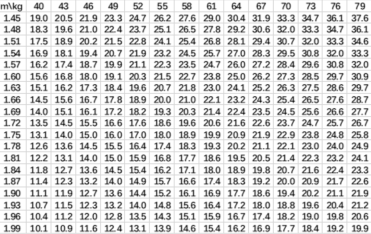

In [ ]:
print("m\kg", end='\t')
for weight in range(40, 81, 3):
    print(str(weight) + "kg", end='\t')
print()
for height in range(145, 199, 10):
    height = height / 100
    print(str(height) + "m", end='\t')
    for weight in range(40, 81, 3):
        value = weight / height ** 2
        print("{:.1f}".format(value), end='\t')
    print()


## 小试身手

In [ ]:
n=___________
s = '人生苦短我用python'
i=0
while( ________    ):
    print(_________,end="")
    i=i+1
    

In [ ]:
n=_____________
s = '人生苦短我用python'
for ch in___________:
    print(________________)